In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../from_arc/segan_3d_cv.csv')

In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,label,version,fold,hparams_batch_size,hparams_channels_per_group,hparams_data_dirs,hparams_dropout,hparams_early_stopping_patience,hparams_epochs,hparams_folds,...,metrics_train_opt1_loss_epoch_final,metrics_train_opt1_dsc_0_epoch_min,metrics_train_opt1_dsc_0_epoch_max,metrics_train_opt1_dsc_0_epoch_final,metrics_train_opt1_dsc_1_epoch_min,metrics_train_opt1_dsc_1_epoch_max,metrics_train_opt1_dsc_1_epoch_final,metrics_train_opt1_dsc_2_epoch_min,metrics_train_opt1_dsc_2_epoch_max,metrics_train_opt1_dsc_2_epoch_final
0,segan_3d_cv,16579298,0,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,250,5,...,90.868156,0.000000,0.917148,0.908445,0.000000,0.637848,0.632821,0.000000e+00,6.460793e-01,0.000000
1,segan_3d_cv,16579300,0,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,8.377064,0.000000,0.944404,0.938809,0.000000,0.973332,0.966471,0.000000e+00,9.910766e-01,0.986569
2,segan_3d_cv,16579297,0,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,250,5,...,41.092896,0.000000,0.957724,0.928311,0.000030,0.981281,0.639884,0.000000e+00,9.949712e-01,0.000000
3,segan_3d_cv,16579299,0,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,1.193550,0.886007,0.954388,0.930208,0.824794,0.979572,0.962717,9.001558e-01,9.932921e-01,0.982795
4,segan_3d_cv,16579299,1,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,1.359631,0.891306,0.950784,0.933129,0.818640,0.977205,0.965880,8.799469e-01,9.930086e-01,0.988032
5,segan_3d_cv,16579298,1,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,250,5,...,142.846436,0.000000,0.805190,0.315655,0.000000,0.276092,0.000000,0.000000e+00,5.975249e-01,0.000000
6,segan_3d_cv,16579298,2,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,250,5,...,137.291931,0.000000,0.313364,0.000000,0.000000,0.013853,0.000000,0.000000e+00,5.820974e-01,0.581987
7,segan_3d_cv,16579299,2,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,1.391149,0.885650,0.952621,0.937104,0.781480,0.978807,0.969294,8.430497e-01,9.934443e-01,0.985435
8,segan_3d_cv,16579300,1,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,7.872094,0.837644,0.958237,0.945655,0.703302,0.981139,0.973431,8.036769e-01,9.943118e-01,0.990759
9,segan_3d_cv,16579298,3,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,250,5,...,138.863083,0.000000,0.912576,0.000000,0.000000,0.636203,0.000000,0.000000e+00,6.552818e-01,0.583618


In [4]:
col_rename_dict = {}
for col in df.columns:
    if "metrics" in col:
        col_str = col
        col_str = col_str.replace("metrics_", "")
        col_str = col_str.replace("metrics ", "")
        col_str = col_str.replace("dsc_0", "cort_dice")
        col_str = col_str.replace("dsc_1", "trab_dice")
        col_str = col_str.replace("dsc_2", "back_dice")
        col_rename_dict[col] = col_str
df.rename(columns=col_rename_dict, inplace=True)

In [5]:
id_vars = ["label", "version", "fold"]
for col in df.columns:
    if "hparams" in col:
        id_vars.append(col)
df = pd.melt(df, id_vars=id_vars)
df

,label,version,fold,hparams_batch_size,hparams_channels_per_group,hparams_data_dirs,hparams_dropout,hparams_early_stopping_patience,hparams_epochs,hparams_folds,...,hparams_logger,hparams_loss_function,hparams_model_channels,hparams_num_gpus,hparams_num_workers,hparams_output_channels,hparams_upsample_mode,hparams_version,variable,value
0,segan_3d_cv,16579298,0,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,250,5,...,True,L1Loss(),"[32, 64, 128]",2,6,3,trilinear,16579298,val_loss_epoch_min,4.378948
1,segan_3d_cv,16579300,0,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,True,L1Loss(),"[32, 64, 128]",2,6,3,trilinear,16579300,val_loss_epoch_min,1.296231
2,segan_3d_cv,16579297,0,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,250,5,...,True,L1Loss(),"[32, 64, 128]",2,6,3,trilinear,16579297,val_loss_epoch_min,1.311786
3,segan_3d_cv,16579299,0,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,True,L1Loss(),"[32, 64, 128]",2,6,3,trilinear,16579299,val_loss_epoch_min,0.122640
4,segan_3d_cv,16579299,1,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,True,L1Loss(),"[32, 64, 128]",2,6,3,trilinear,16579299,val_loss_epoch_min,0.116922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,segan_3d_cv,16579299,4,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,True,L1Loss(),"[32, 64, 128]",2,6,3,trilinear,16579299,train_opt1_back_dice_epoch_final,0.472168
608,segan_3d_cv,16579297,1,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,250,5,...,True,L1Loss(),"[32, 64, 128]",2,6,3,trilinear,16579297,train_opt1_back_dice_epoch_final,0.926782
609,segan_3d_cv,16579300,2,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,250,5,...,True,L1Loss(),"[32, 64, 128]",2,6,3,trilinear,16579300,train_opt1_back_dice_epoch_final,0.582287
610,segan_3d_cv,16579297,2,16,16,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,250,5,...,True,L1Loss(),"[32, 64, 128]",2,6,3,trilinear,16579297,train_opt1_back_dice_epoch_final,0.672366


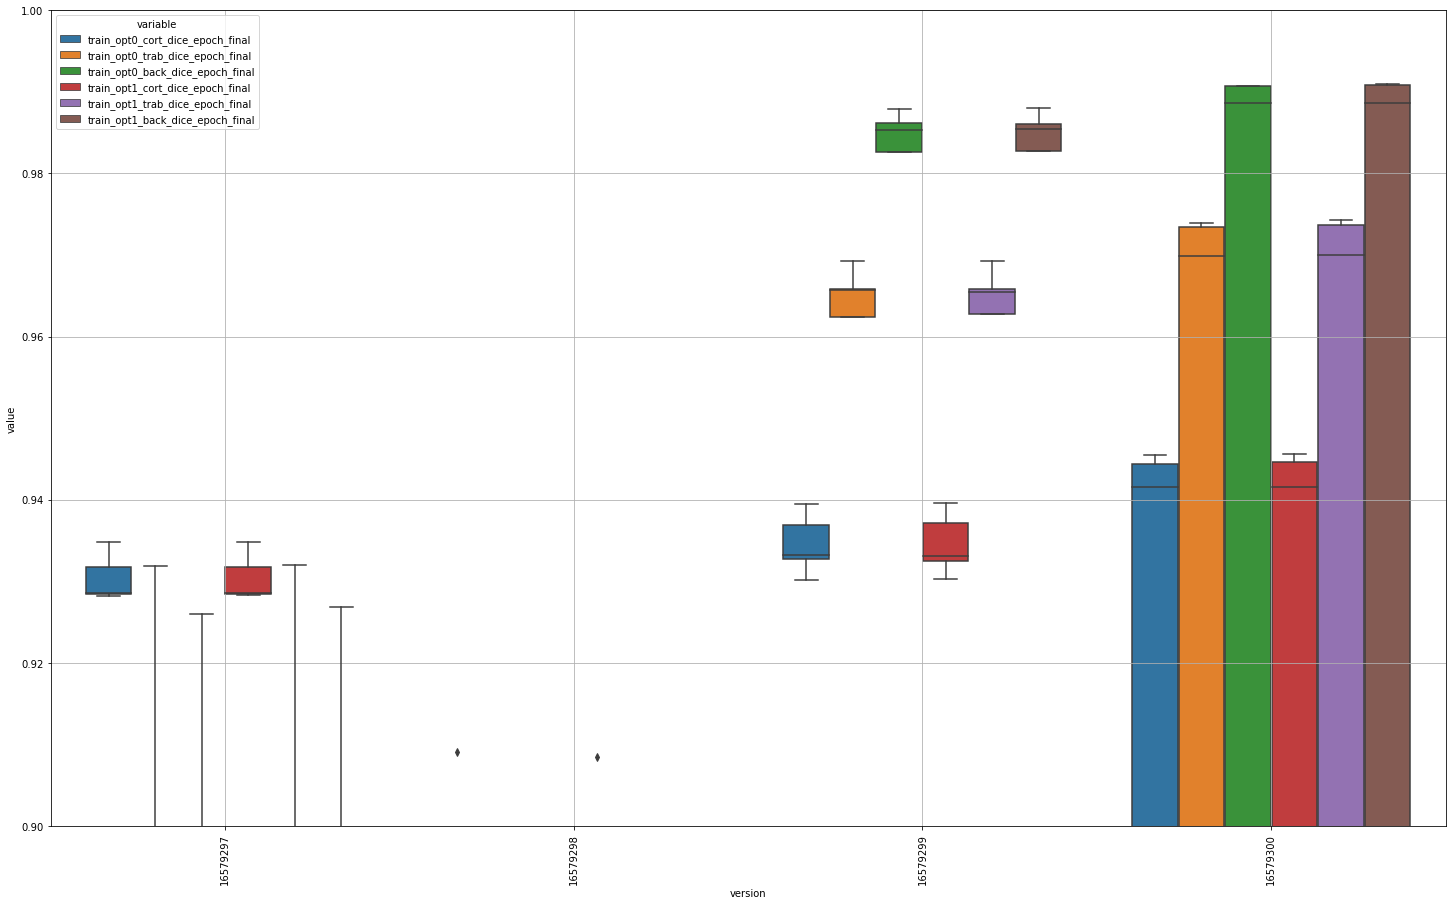

In [6]:
plt.figure(figsize=(25,15))
sns.boxplot(
    data=df[df["variable"].str.contains("train") & df["variable"].str.contains("dice") & df["variable"].str.contains("final")], 
    x="version", y="value", hue="variable"
)
plt.ylim([0.9, 1.0])
plt.xticks(rotation=90)
plt.grid()
plt.show()

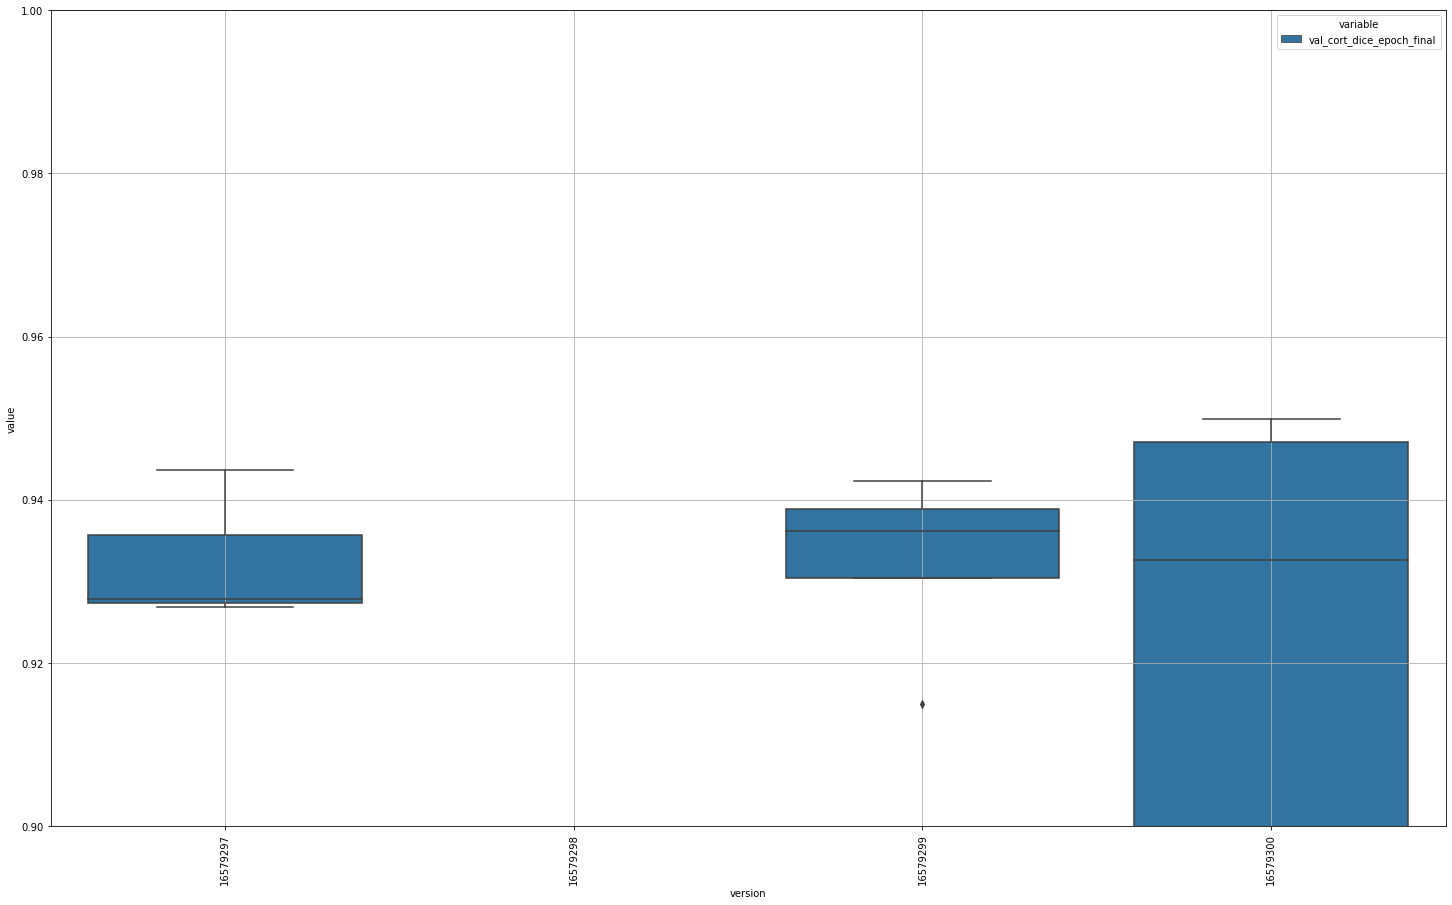

In [13]:
plt.figure(figsize=(25,15))
sns.boxplot(
    data=df[df["variable"].str.contains("val") & df["variable"].str.contains("cort_dice") & df["variable"].str.contains("final")], 
    x="version", y="value", hue="variable"
)
plt.ylim([0.9, 1.0])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [10]:
df_averaged = df.groupby(["version", "variable"], as_index=False)['value'].mean()
df_averaged_cort_dice = df_averaged[df_averaged["variable"]=="val_cort_dice_epoch_final"]
df_averaged_cort_dice.sort_values(by="value", ascending=False)

,version,variable,value
27,16579297,val_cort_dice_epoch_final,0.932725
99,16579299,val_cort_dice_epoch_final,0.932551
135,16579300,val_cort_dice_epoch_final,0.703751
63,16579298,val_cort_dice_epoch_final,0.234672


In [11]:
best_version = df_averaged_cort_dice.sort_values(by="value", ascending=False)['version'].iloc[0]
df[df["version"] == best_version][[col for col in df.columns if "hparam" in col]].iloc[0]

hparams_batch_size                                                                16
hparams_channels_per_group                                                        16
hparams_data_dirs                  ['/home/njneetes/work/data/NORMXTII/radius_pic...
hparams_dropout                                                                  0.1
hparams_early_stopping_patience                                                   40
hparams_epochs                                                                   250
hparams_folds                                                                      5
hparams_input_channels                                                             1
hparams_is_3d                                                                   True
hparams_label                                                            segan_3d_cv
hparams_learning_rate                                                           0.01
hparams_log_on_epoch                                             

In [12]:
df[df["version"] == best_version].groupby(["variable"])['value'].mean()

variable
train_opt0_back_dice_epoch_final     0.532734
train_opt0_back_dice_epoch_max       0.888119
train_opt0_back_dice_epoch_min       0.078523
train_opt0_cort_dice_epoch_final     0.930533
train_opt0_cort_dice_epoch_max       0.947972
train_opt0_cort_dice_epoch_min       0.092158
train_opt0_loss_epoch_final         26.188260
train_opt0_loss_epoch_max           27.633519
train_opt0_loss_epoch_min            0.829514
train_opt0_trab_dice_epoch_final     0.523896
train_opt0_trab_dice_epoch_max       0.866451
train_opt0_trab_dice_epoch_min       0.018203
train_opt1_back_dice_epoch_final     0.533049
train_opt1_back_dice_epoch_max       0.888158
train_opt1_back_dice_epoch_min       0.075832
train_opt1_cort_dice_epoch_final     0.930576
train_opt1_cort_dice_epoch_max       0.948133
train_opt1_cort_dice_epoch_min       0.096229
train_opt1_loss_epoch_final         26.071859
train_opt1_loss_epoch_max           27.595263
train_opt1_loss_epoch_min            0.823661
train_opt1_trab_dice_epoc